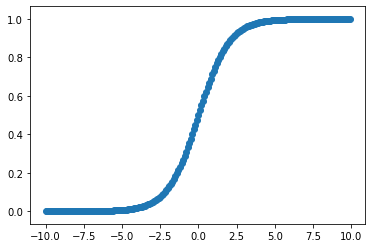

In [5]:
# 지도학습에서 데이터의 라벨이 0 혹은 1로 설정
# 이런 데이터는 기존의 선형회귀방식으로는 학습하고 prediction 불가?
# 이런 데이터는 어떻게 학습하고 예측하면 좋을까?

# 가설을 바꿔야해요!
# H = XW + b (다중선형회귀에서 가설) => 직선
# 직선이 아닌 0 ~ 1 사이의 값을 가지는 함수로 가설 표현
# sigmoid 함수 이용해서 표현

# logistic => H' = 1 / (1+e^-(WX+b))
# 이걸 코스트 함수 그래프로 나타내면 
# W자 모양이 나오는데 코스트 함수 그래프 는 매끄러운 곡선을 나타내야한다 
# 따라서? 코스트 함수를 변경

# 코스트 = -ylog(H) - (1-y)log(1-H)




import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 0.1)
y = 1 / (1 + np.exp(-x))



plt.scatter(x,y)



In [19]:
# 수학식을 이용해 코스트 함수를 사용할 데이터는 
# 공부시간            어학연수         시험성적
#   1                    1               0(Fail)
#   2                   0                0
#   5                   1                0
#   2                   3               1(Pass)
#   3                   3                1
#   8                   1                1
#  10                   0                1

import tensorflow as tf

# training data set
x_data = [[1,1],
          [2,0],
          [5,1],
          [2,3],
          [3,3],
          [8,1],
          [10,0]]

y_data = [[0],[0],[0],[1],[1],[1],[1]]

# placeholder
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([2,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
# 함수 만들 떄 이렇게 만들어서 저기 logits 속성에는 logit를 넣어어야함 (H를 넣는 게 아님)
logit = tf.matmul(X,W) + b
# sigmoid 이용해서 곡선 이용
H = tf.sigmoid(logit) 

# cost func (tf에서 제공하는 함수를 이용)
# 매끄러운 곡선을 만들기 위해
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits= logit, labels= Y))

# train node
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

## session 초기화 (initialization)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(3000):
    _, cost_val = sess.run([train,cost], feed_dict={ X : x_data,
                                                     Y : y_data})
    if step % 300 == 0:
        print("cost val: {}".format(cost_val))

#predict
result = sess.run(H, feed_dict={X : [[7,1]]})
print(result)


cost val: 1.271128535270691
cost val: 0.5078676342964172
cost val: 0.41074737906455994
cost val: 0.382272869348526
cost val: 0.36111339926719666
cost val: 0.34330061078071594
cost val: 0.32798001170158386
cost val: 0.31465521454811096
cost val: 0.3029566705226898
cost val: 0.29259762167930603
[[0.8009299]]
